Importing Packages

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, optimizers, utils, layers
import matplotlib.pyplot as plt

Loading Datasets

In [17]:
(train_data, train_label),(test_data, test_label) = boston_housing.load_data()
print (train_data.shape)
print (test_data.shape)
print (train_label)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

In [18]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [19]:
train_label[0]

15.2

Preparing Data

In [20]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /=std
test_data -=mean
test_data /=std

In [21]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

Model Building

In [22]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

K - Fold Validation

In [24]:
k = 4
num_val_samples = len(train_data)//k
num_epochs = 500
all_scores = []
all_mae_histories = []
for i in range(k):
  print ('processing fold # ', i)
  val_data = train_data[i * num_val_samples: 
                        (i + 1) * num_val_samples]
  val_labels = train_label[i *num_val_samples:
                           (i+1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], 
                                       train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_label = np.concatenate([train_label[:i * num_val_samples], 
                                        train_label[(i +1) * num_val_samples:]],axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_label, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
  all_scores.append(val_mse)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)


processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


# Error

In [25]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print ("All fold validation errors ", all_scores)
print ('Mean of all validation errors', np.mean(all_scores))
print ('Average Mean Absolute Error', average_mae_history)

All fold validation errors  [10.718419075012207, 16.805723190307617, 15.276890754699707, 14.488972663879395]
Mean of all validation errors 14.322501420974731
Average Mean Absolute Error [10.77899694442749, 3.676795184612274, 3.0542960166931152, 2.724868357181549, 2.5988157987594604, 2.452986776828766, 2.3875914812088013, 2.2964763045310974, 2.2684894800186157, 2.2189574241638184, 2.187246263027191, 2.1315890550613403, 2.1001941561698914, 2.0529863834381104, 2.070217102766037, 1.996612936258316, 2.00228413939476, 1.997213900089264, 1.9761236906051636, 1.9741876423358917, 1.9206915497779846, 1.9160593450069427, 1.9051325023174286, 1.9011353254318237, 1.8755196034908295, 1.8558495342731476, 1.8508147597312927, 1.8287982940673828, 1.8113433718681335, 1.7970576584339142, 1.8180826902389526, 1.799123376607895, 1.809719979763031, 1.7616422772407532, 1.749068558216095, 1.7447467148303986, 1.7355467677116394, 1.709586650133133, 1.6963547766208649, 1.6912345886230469, 1.6908431649208069, 1.69300

In [26]:
[len(x) for x in all_mae_histories]

[500, 500, 500, 500]

# Plotting Error

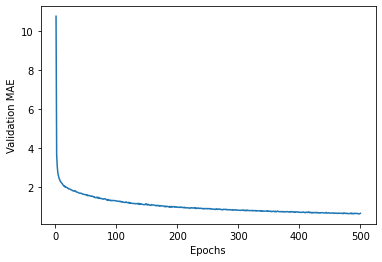

In [38]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show() 

# Smoothing the Curve

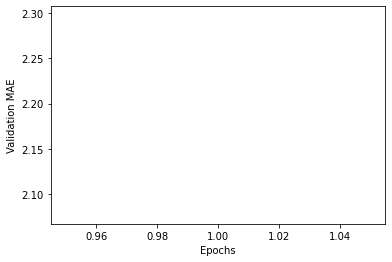

In [48]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


# **Training & Validating Final Model on Complete DataSet**

In [54]:
model = build_model()
model.fit(train_data, train_label,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_label)
print (test_mae_score)  

4/4 [==============================] - 0s 3ms/step - loss: 16.5102 - mae: 2.5453
2.5452725887298584
